### Import all Important Library 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import * 
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import LabelEncoder, StandardScaler

### Import dataset

In [2]:
data = pd.read_csv('Medical Cost Personal dataset.csv')
df = pd.DataFrame(data) 
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

### Checked data types of all columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Number of rows and columns

In [6]:
df.shape

(1338, 7)

In [7]:
df.size

9366

### Checked Null values in dataset

In [8]:
df.isnull().sum() / len(df)

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

In [9]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [10]:
df.drop_duplicates(inplace = True)

In [11]:
df.duplicated().sum()

0

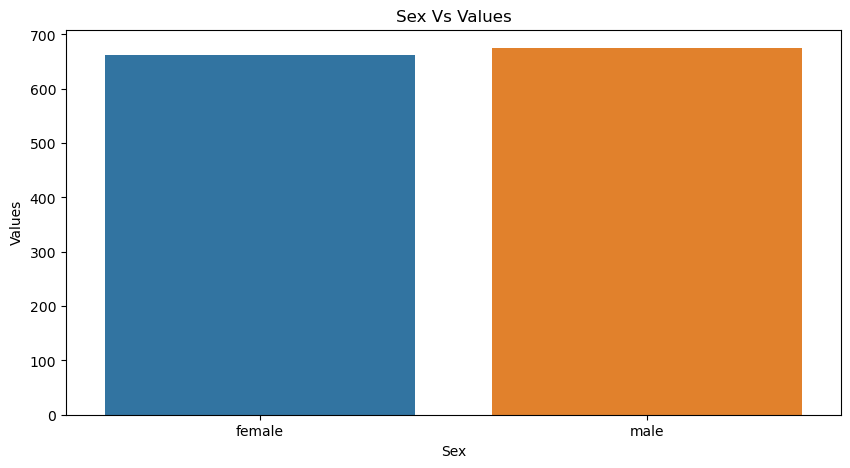

In [12]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'sex', data = df)
plt.xlabel('Sex')
plt.ylabel('Values')
plt.title('Sex Vs Values')
plt.show()

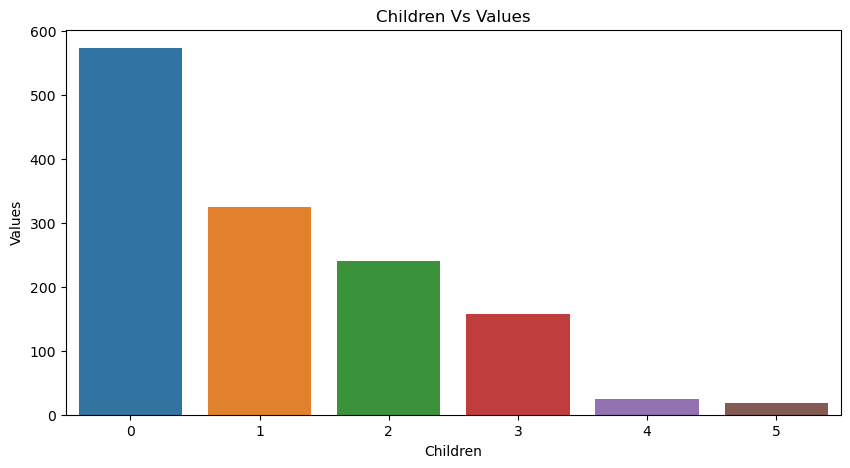

In [13]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'children', data = df)
plt.xlabel('Children')
plt.ylabel('Values')
plt.title('Children Vs Values')
plt.show()

In [19]:
LE = LabelEncoder() 
SS = StandardScaler()

In [21]:
for i in df: 
    if df[i].dtypes == 'object': 
        df[i] = LE.fit_transform(df[i])

In [22]:
x = df.drop(columns = 'charges')
y = df['charges']

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42, test_size = 0.2)

In [24]:
x_train = SS.fit_transform(x_train)
x_test = SS.fit_transform(x_test)

In [25]:
# Short Form 

LR = LinearRegression()
lasso = Lasso(alpha=0.01)
ridge = Ridge(alpha=0.01)

In [63]:
# To Detect Overfitting or Underfitting

y_train_pred = LR.predict(x_train)
y_test_pred = LR.predict(x_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Train R²:", r2_train)
print("Test R²:", r2_test)
print("Difference:", r2_train - r2_test)

Train R²: 0.7297182858804965
Test R²: 0.7917732244147458
Difference: -0.06205493853424937


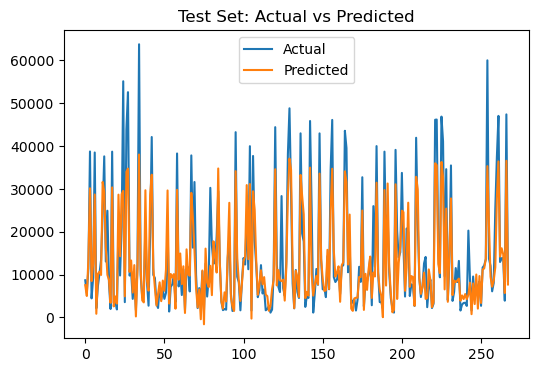

In [64]:
# Visulization To Detect Overfitting or Underfitting

import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.plot(y_test.values, label="Actual")
plt.plot(y_test_pred, label="Predicted")
plt.title("Test Set: Actual vs Predicted")
plt.legend()
plt.show()

In [26]:
# For Linear Regression

LR.fit(x_train, y_train)

LinearRegression()

In [27]:
y_pred = LR.predict(x_test)

In [28]:
Error = pd.DataFrame({'Actual Value': y_test, 'Predicated Value': y_pred}) 
Error

,Actual Value,Predicated Value
900,8688.85885,7549.220797
1064,5708.86700,5021.966907
1256,11436.73815,13621.764847
298,38746.35510,30154.450023
237,4463.20510,8484.634734
...,...,...
534,13831.11520,16167.088817
542,13887.20400,14760.925530
760,3925.75820,5706.195104
1284,47403.88000,36574.874450


In [29]:
print("R²:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R²: 0.7917732244147458
MAE: 4134.6434571058535
MSE: 38262932.70951559
RMSE: 6185.703897659149


In [30]:
# For Ridge 

ridge.fit(x_train, y_train)

Ridge(alpha=0.01)

In [31]:
ridge_y_pred = ridge.predict(x_test) 

In [32]:
print("R²:", r2_score(y_test, ridge_y_pred))
print("MAE:", mean_absolute_error(y_test, ridge_y_pred))
print("MSE:", mean_squared_error(y_test, ridge_y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, ridge_y_pred)))

R²: 0.7917710765375051
MAE: 4134.663137347078
MSE: 38263327.394983396
RMSE: 6185.735800612842


In [33]:
# For Lasso

lasso.fit(x_train, y_train)

Lasso(alpha=0.01)

In [34]:
lasso_y_pred = lasso.predict(x_test)

In [35]:
print("R²:", r2_score(y_test, lasso_y_pred))
print("MAE:", mean_absolute_error(y_test, lasso_y_pred))
print("MSE:", mean_squared_error(y_test, lasso_y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, lasso_y_pred)))

R²: 0.7917728362112886
MAE: 4134.6442879299775
MSE: 38263004.04425496
RMSE: 6185.709663753623


In [47]:
# Hyperparameter Tunning on Lasso, Ridge

from sklearn.model_selection import GridSearchCV

params = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_lasso = GridSearchCV(Lasso(), params, cv = 5)
grid_ridge = GridSearchCV(Ridge(), params, cv = 5)

In [48]:
grid_lasso.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100]})

In [49]:
grid_ridge.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100]})

In [50]:
print(grid_lasso.best_estimator_)
print(grid_ridge.best_estimator_)

Lasso(alpha=100)
Ridge(alpha=10)


In [51]:
new_lasso = Lasso(alpha = 100) 
new_ridge = Ridge(alpha = 10)

In [52]:
new_lasso.fit(x_train, y_train)

Lasso(alpha=100)

In [53]:
# new_lasso_y_pred

new_lasso_y_pred = new_lasso.predict(x_test)

In [54]:
print("R²:", r2_score(y_test, new_lasso_y_pred))
print("MAE:", mean_absolute_error(y_test, new_lasso_y_pred))
print("MSE:", mean_squared_error(y_test, new_lasso_y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, new_lasso_y_pred)))

R²: 0.7876438289259057
MAE: 4146.999272691577
MSE: 39021734.171413936
RMSE: 6246.737882400216


In [57]:
new_ridge.fit(x_train, y_train)

Ridge(alpha=10)

In [58]:
# new_ridge_y_pred

new_ridge_y_pred = new_ridge.predict(x_test)

In [59]:
print("R²:", r2_score(y_test, new_ridge_y_pred))
print("MAE:", mean_absolute_error(y_test, new_ridge_y_pred))
print("MSE:", mean_squared_error(y_test, new_ridge_y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, new_ridge_y_pred)))

R²: 0.7895945128569253
MAE: 4154.128333937978
MSE: 38663284.170061536
RMSE: 6217.980714835126


In [71]:
Result = pd.DataFrame({
    'Model': ['Linear Regression', 'Lasso Regression', 'Ridge Regression'],
    'R²': [0.7918, 0.7876, 0.7896],
    'MAE': [4134.64, 4147.00, 4154.13],
    'MSE': [38262932.71, 39021734.17, 38663284.17],
    'RMSE': [6185.70, 6246.74, 6217.98]
})

In [72]:
Result

,Model,R²,MAE,MSE,RMSE
0,Linear Regression,0.7918,4134.64,38262932.71,6185.70
1,Lasso Regression,0.7876,4147.00,39021734.17,6246.74
2,Ridge Regression,0.7896,4154.13,38663284.17,6217.98


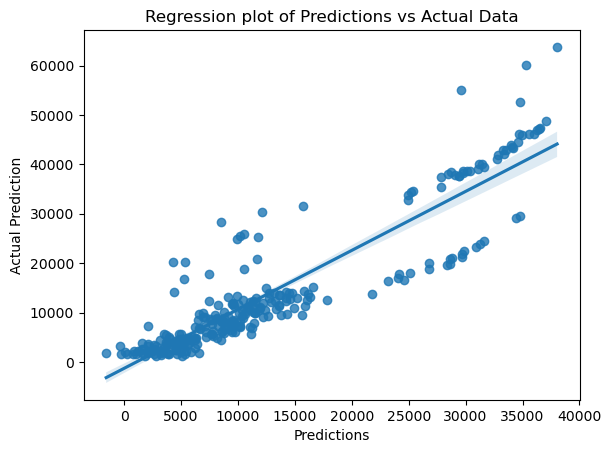

In [75]:
sns.regplot(x = y_pred, y = y_test)
plt.xlabel("Predictions")
plt.ylabel("Actual Prediction")
plt.title("Regression plot of Predictions vs Actual Data")
plt.show()